In [1]:
import numpy as np
import matplotlib.pyplot as plt
neon_phi = np.array([2572, 2546, 2477, 2467, 2438, 2414, 2406, 2369, 2360, 2342, 2332, 2316, 2295, 2271, 2264, 2244, 2234, 2214, 2187, 2175, 2144, 2129])
neon_lambda = np.array([7032, 6929, 6717, 6678, 6599, 6533, 6507, 6402, 6383, 6334, 6305, 6267, 6217, 6164, 6143, 6096, 6074, 6030, 5976, 5945, 5882, 5852])

In [2]:
def print_fit(params, cov):
    names = ['a', 'b', 'c']
    names_cov = ['delta a', 'delta b', 'delta c']
    for i in range(len(params)):
        print('%s    %E    %s    %E' %(names[i], params[i], names_cov[i], cov[i]))

Градуировка по спектру неона

1) Приближение линейной функцией $f(x)=ax+b$

a    2.606284E+00    delta a    5.231090E-02
b    2.560760E+02    delta b    1.219013E+02


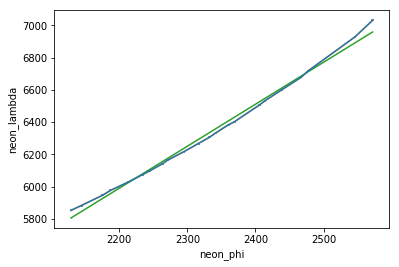

In [25]:
x = neon_phi
y = neon_lambda
fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
plt.errorbar(x, y, xerr=2)
plt.xlabel('neon_phi')
plt.ylabel('neon_lambda')
plt.plot(x, y)
plt.plot(x, params[0]*x+params[1])
plt.show()

2) Приближение квадратичной функцией $f(x)=ax^2+bx+c$

a    1.687427E-03    delta a    5.601765E-05
b    -5.300516E+00    delta b    2.625839E-01
c    9.492497E+03    delta c    3.070926E+02


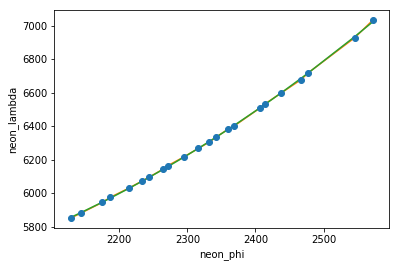

In [28]:
def f(x, a, b, c):
    return a*x**2+b*x+c

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
fit2 = np.polyfit(x, y, 2, cov=True)
params2 = fit2[0]
cov2 = list(map(lambda x: np.sqrt(x), np.diag(fit2[1])))
params2 = np.array(popt)
cov2 = np.array(pcov)
print_fit(params2, cov2)
plt.errorbar(x, y, xerr=2, fmt='o')
plt.xlabel('neon_phi')
plt.ylabel('neon_lambda')
plt.plot(x, y)
plt.plot(x, params2[0]*x**2+params2[1]*x+params2[2])
plt.show()

In [5]:
def get_lambda(params, cov, x, cov_x):
    my_lambda = params[0]*x**2+params2[1]*x+params2[2]
    cov_lambda = (cov[0]/params[0]+2*cov_x/x)*params[0]*x**2 + (cov[1]/params[1]+cov_x/x)*params[1]*x+cov[2]
    return my_lambda, cov_lambda

Видно, что квадратичная функция лучше приближает зависимость угла поворота барабана от $\lambda$

По градуировке барабана определим значения $\lambda$, при которых проводились измерения зависимости $V2(V1)$

In [6]:
lambdas = []
deg = [i for i in range(2100, 2700, 100)]
for i in range(len(deg)):
    my_lambda, cov_lambda = get_lambda(params2, cov2, deg[i], 2)
    lambdas.append([my_lambda, cov_lambda])
    print('%s    %E A    %s    %E A' %('lambda', my_lambda, 'delta_lambda', cov_lambda))

lambda    5.802968E+03 A    delta_lambda    1.172355E+03 A
lambda    5.998510E+03 A    delta_lambda    1.226255E+03 A
lambda    6.227800E+03 A    delta_lambda    1.281340E+03 A
lambda    6.490840E+03 A    delta_lambda    1.337609E+03 A
lambda    6.787628E+03 A    delta_lambda    1.395062E+03 A
lambda    7.118164E+03 A    delta_lambda    1.453700E+03 A


Для каждой длины волны построим зависимость $V2(V1)$

In [7]:
V0 = []
I_err = 0.001
V_err = 0.001

In [8]:
print('%s    %E A    %s    %E A' %('lambda', lambdas[0][0], 'delta_lambda', lambdas[0][1]))

lambda    5.802968E+03 A    delta_lambda    1.172355E+03 A


a    1.160356E+01    delta a    2.671249E+00
b    -1.587145E+00    delta b    1.094886E+00


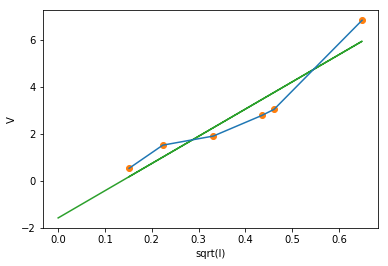

In [9]:
I = np.array([0.023, 0.050, 0.11, 0.19, 0.213, 0.422])
V = np.array([0.53, 1.517, 1.905, 2.789, 3.045, 6.845])
sqrt_I = np.array(list(map(lambda x: np.sqrt(x), I)))
y = V
x = sqrt_I
plt.errorbar(x, y, xerr=I_err, yerr=V_err)
plt.plot(x, y, 'o')
fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
V0.append((params[1], cov[1]))
print_fit(params, cov)
plt.ylabel('V')
plt.xlabel('sqrt(I)')
x = list(x)
x.append(0)
x = np.array(x)
plt.plot(x, params[0]*x+params[1])
# plt.ylim([0,0.5])
# plt.xlim([0,3.2])
plt.show()

In [10]:
print('%s    %E A    %s    %E A' %('lambda', lambdas[1][0], 'delta_lambda', lambdas[1][1]))

lambda    5.998510E+03 A    delta_lambda    1.226255E+03 A


a    8.381051E+00    delta a    3.023966E+00
b    -1.346389E-01    delta b    1.305919E+00


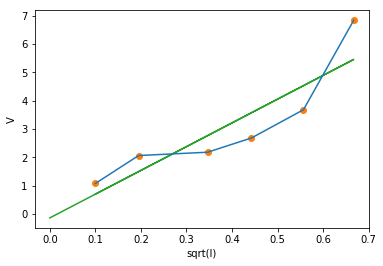

In [11]:
I = np.array([0.01, 0.038, 0.12, 0.196, 0.310, 0.445])
V = np.array([1.08, 2.066, 2.183, 2.686, 3.682, 6.838])
sqrt_I = np.array(list(map(lambda x: np.sqrt(x), I)))
y = V
x = sqrt_I
plt.errorbar(x, y, xerr=I_err, yerr=V_err)
plt.plot(x, y, 'o')
fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
V0.append((params[1], cov[1]))
print_fit(params, cov)
plt.ylabel('V')
plt.xlabel('sqrt(I)')
x = list(x)
x.append(0)
x = np.array(x)
plt.plot(x, params[0]*x+params[1])
# plt.ylim([0,0.6])
# plt.xlim([0.5,4.5])
plt.show()

In [12]:
print('%s    %E A    %s    %E A' %('lambda', lambdas[2][0], 'delta_lambda', lambdas[2][1]))

lambda    6.227800E+03 A    delta_lambda    1.281340E+03 A


a    1.036108E+01    delta a    2.921811E+00
b    -8.470862E-01    delta b    1.302311E+00


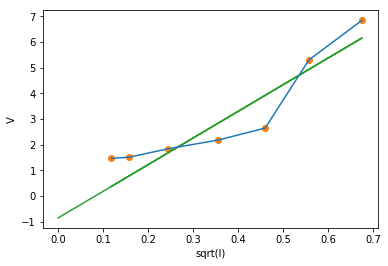

In [13]:
I = np.array([0.014, 0.025, 0.06, 0.127, 0.212, 0.311, 0.457])
V = np.array([1.470, 1.517, 1.845, 2.185, 2.648, 5.3, 6.844])
sqrt_I = np.array(list(map(lambda x: np.sqrt(x), I)))
y = V
x = sqrt_I
plt.errorbar(x, y, xerr=I_err, yerr=V_err)
plt.plot(x, y, 'o')
fit = np.polyfit(x[1:], y[1:], 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
V0.append((params[1], cov[1]))
print_fit(params, cov)
plt.ylabel('V')
plt.xlabel('sqrt(I)')
x = list(x)
x.append(0)
x = np.array(x)
plt.plot(x, params[0]*x+params[1])
# plt.ylim([0,0.5])
# plt.xlim([0.75, 3])
plt.show()

In [14]:
print('%s    %E A    %s    %E A' %('lambda', lambdas[3][0], 'delta_lambda', lambdas[3][1]))

lambda    6.490840E+03 A    delta_lambda    1.337609E+03 A


a    8.148401E+00    delta a    6.856383E+00
b    -1.031244E-01    delta b    3.269567E+00


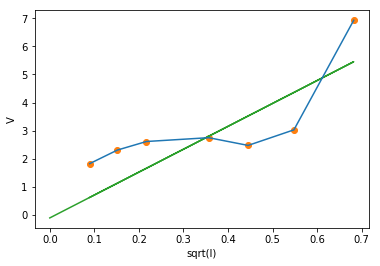

In [15]:
I = np.array([0.008, 0.023, 0.047, 0.127, 0.198, 0.3, 0.465])
V = np.array([1.828, 2.311, 2.6151, 2.751, 2.476, 3.03, 6.928])
sqrt_I = np.array(list(map(lambda x: np.sqrt(x), I)))
y = V
x = sqrt_I
plt.errorbar(x, y, xerr=I_err, yerr=V_err)
plt.plot(x, y, 'o')
fit = np.polyfit(x[2:], y[2:], 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
V0.append((params[1], cov[1]))
print_fit(params, cov)
plt.ylabel('V')
plt.xlabel('sqrt(I)')
x = list(x)
x.append(0)
x = np.array(x)
plt.plot(x, params[0]*x+params[1])
# plt.ylim([0,0.5])
# plt.xlim([1.5, 3])
plt.show()

In [16]:
print('%s    %E A    %s    %E A' %('lambda', lambdas[4][0], 'delta_lambda', lambdas[4][1]))

lambda    6.787628E+03 A    delta_lambda    1.395062E+03 A


a    8.377743E+00    delta a    5.417602E+00
b    1.270517E-01    delta b    2.603833E+00


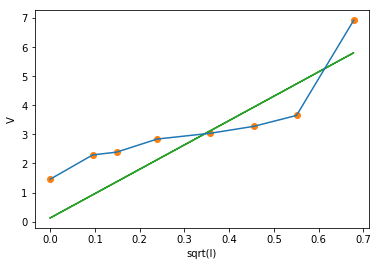

In [17]:
I = np.array([0,0.009, 0.022, 0.057, 0.128, 0.207, 0.303, 0.460])
V = np.array([1.460, 2.295, 2.390, 2.840, 3.040, 3.278, 3.653, 6.927])
sqrt_I = np.array(list(map(lambda x: np.sqrt(x), I)))
y = V
x = sqrt_I
plt.errorbar(x, y, xerr=I_err, yerr=V_err)
plt.plot(x, y, 'o')
fit = np.polyfit(x[3:], y[3:], 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
V0.append((params[1], cov[1]))
print_fit(params, cov)
plt.xlabel('sqrt(I)')
plt.ylabel('V')
x = list(x)
x.append(0)
x = np.array(x)
plt.plot(x, params[0]*x+params[1])
# plt.xlim([1.4, 4])
# plt.ylim([-0.05, 0.6])
plt.show()

In [18]:
print('%s    %E A    %s    %E A' %('lambda', lambdas[5][0], 'delta_lambda', lambdas[5][1]))

lambda    7.118164E+03 A    delta_lambda    1.453700E+03 A


a    5.499139E+00    delta a    1.406783E+00
b    1.971159E+00    delta b    5.455252E-01


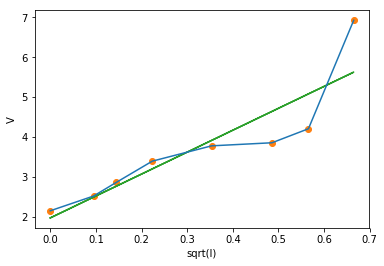

In [19]:
I = np.array([0, 0.009, 0.021, 0.05, 0.125, 0.236, 0.320, 0.442])
V = np.array([2.15, 2.520, 2.864, 3.395, 3.779, 3.856, 4.208, 6.928])
sqrt_I = np.array(list(map(lambda x: np.sqrt(x), I)))
y = V
x = sqrt_I
plt.errorbar(x, y, xerr=I_err, yerr=V_err)
plt.plot(x, y, 'o')
fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
V0.append((params[1], cov[1]))
print_fit(params, cov)
plt.xlabel('sqrt(I)')
plt.ylabel('V')
x = list(x)
x.append(0)
x = np.array(x)
plt.plot(x, params[0]*x+params[1])
# plt.xlim([1.8, 4.5])
# plt.ylim([-0.25, 0.6])
plt.show()

Найдем $V_0$ для различных $\lambda$

In [20]:
print('lambda           delta_lambda     V0               delta_V0')
for i in range(len(lambdas)):
    print('%E     %E     %E     %E' %(lambdas[i][0], lambdas[i][1], V0[i][0], V0[i][1]))

lambda           delta_lambda     V0               delta_V0
5.802968E+03     1.172355E+03     -1.587145E+00     1.094886E+00
5.998510E+03     1.226255E+03     -1.346389E-01     1.305919E+00
6.227800E+03     1.281340E+03     -8.470862E-01     1.302311E+00
6.490840E+03     1.337609E+03     -1.031244E-01     3.269567E+00
6.787628E+03     1.395062E+03     1.270517E-01     2.603833E+00
7.118164E+03     1.453700E+03     1.971159E+00     5.455252E-01


 Вычислим значения $\omega$ по значениям $\lambda$, аппроксимируем зависимость $V(\omega)$ прямой и найдем $\frac{dV}{d\omega}$

a    4.602710E-15    delta a    1.836111E-15
b    -1.351802E+01    delta b    5.443909E+00


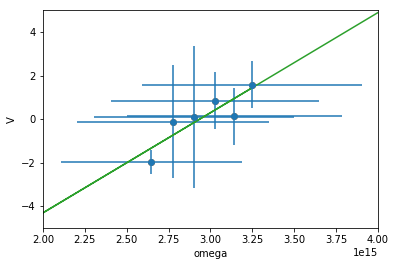

In [21]:
x = []
y = []
x_err = []
y_err = []
for i in range(len(lambdas)):
    x.append(2*np.pi*3*10**8/(lambdas[i][0]*10**-10))
    x_err.append(lambdas[i][1]*2*np.pi*3*10**8/(lambdas[i][0]**2*10**-10))
    y.append(-V0[i][0])
    y_err.append(V0[i][1])
x = np.array(x)
y = np.array(y)
fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
params = list(map(lambda x: float(x), params))
cov = np.array(cov)
params = np.array(params)
print_fit(params, cov)
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o')
plt.plot(x, y, 'o')
plt.xlabel('omega')
plt.ylabel('V')
x = list(x)
x.append(0)
x.append(5*10**15)
x = np.array(x)
plt.xlim([2*10**15, 4*10**15])
plt.ylim([-5, 5])
plt.plot(x, params[0]*x+params[1])
dvdomega = params[0]
delta_dvdomega = cov[0]
plt.show()

Используя равенство $\frac{dV}{d\omega}=\frac{\hbar}{e}$, найдем $\hbar$

In [22]:
e = 1.602*10**-19
h = dvdomega*e
print('h_bar =', h)
delta_h = e*delta_dvdomega
print('delta h_bar =', delta_h)

h_bar = 7.373540737287566e-34
delta h_bar = 2.941450265645747e-34
